In [51]:
from TASEPy import psa_compute
from TASEPy import total_coeffs
from TASEPy import local_density
from TASEPy import mean_density
from TASEPy import current
import numpy as np

In [53]:
wlist = np.random.randint(1, 10, 100) # One dimensional vector [w_1, ... , w_L] where L > l
l = 1 # default == 1
K = 4
rhocoeff, Jcoeff = psa_compute(wlist, K, l) 
# rhocoeff == list of coefficient of local density, rho_i,n where i€[1, L] and n is the order of the coefficient n€[0,K]  
# where rhocoeff(i) == rhocoeff_i+1,n  [two dimensional matrix];

# Jcoeff ==  contains all of the current for every order of the coeffiecient Jcoeff(n) = J_n [one dimensional vector]

## Is possible to save all of the coefficient rhocoeff, Jcoeff = psa_compute(wlist, K, l, True, ’test.csv’)

In [54]:
alpha = 0.2
rho = local_density(rhocoeff, alpha)
#rho = local density at any order for every site [two dimensional matrix where rho(n) = rho_i,n]

mean_rho = mean_density(rho) # mean value for the density at any order n = 1, ..., K [one dimensional vector]

J = current(Jcoeff, alpha) # value of the current at any order n = 0, ... ,K  [one dimensional vector]

In [55]:
print(J)

[0.2, 0.195, 0.19423611111111133, 0.19180829475309039, 0.19250958189301928]


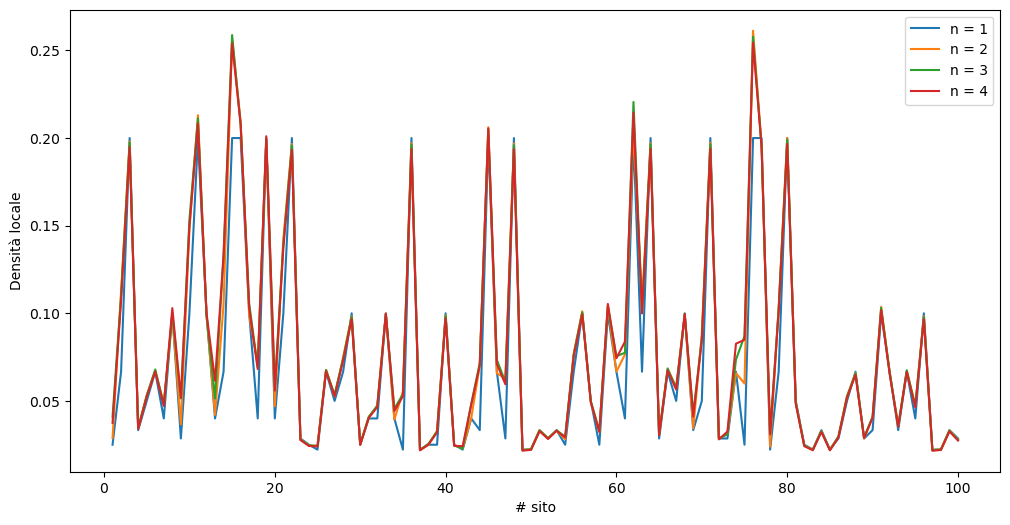

In [56]:
import matplotlib.pyplot as plt

siti = list(range(1, 101))
plt.figure(figsize=(12, 6)) 
plt.plot(siti, rho[1], label = 'n = 1')
plt.plot(siti, rho[2], label = 'n = 2')
plt.plot(siti, rho[3], label = 'n = 3')
plt.plot(siti, rho[4], label = 'n = 4')
plt.xlabel("# sito")
plt.ylabel("Densità locale")

plt.legend()

plt.savefig("Densità_Locale.png")
plt.show()

In [57]:
alpha_list = [round(0.05*x,2) for x in range(21)]

In [58]:
rho_alpha = [[] for k in range(K+1)]
J_alpha = [[] for k in range(K+1)]

for alpha in alpha_list:

    rho = local_density(rhocoeff, alpha)
    mean_rho = mean_density(rho)
    J = current(Jcoeff, alpha)

    for k in range(K+1):
        rho_alpha[k].append(mean_rho[k])
        J_alpha[k].append(J[k])

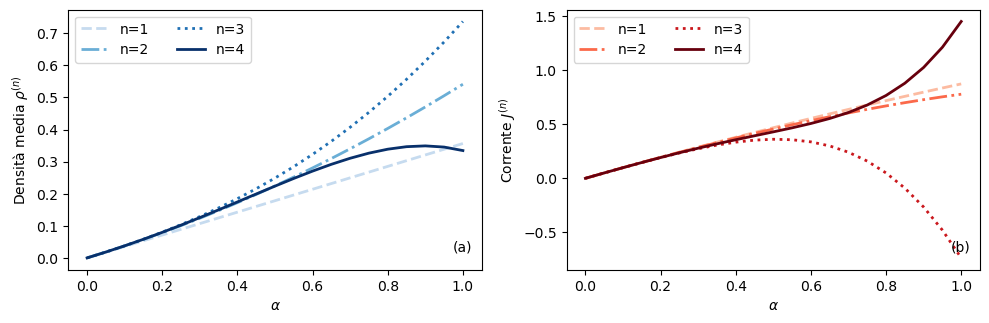

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Choose a colormap (you can change it to your preferred one)
color_map_density = mpl.colormaps['Blues']
color_map_current = mpl.colormaps['Reds']

# Create a new figure and axes for subfigure 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/3))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.',':']

#### PLOT DENSITY
for n in range(1,K+1):

    line_color = color_map_density(n/K)
    
    # Cycle through the linestyles list
    line_style = linestyles[n % len(linestyles)]

    ax1.plot(alpha_list, rho_alpha[n], linewidth=2, label='n=' + str(n),color=line_color, linestyle = line_style)
    
# Set the x and y axis labels
ax1.set_xlabel(r'$\alpha$', fontsize=10)
ax1.set_ylabel(r'Densità media $\rho^{(n)}$', fontsize=10)
ax1.text(0.93,0.07,'(a)',fontsize=10,transform=ax1.transAxes)

# Add a legend
ax1.legend(loc='upper left', fontsize=10,ncol=2)

#### PLOT CURRENT
for n in range(1,K+1):

    line_color = color_map_current(n/K)
    
    # Cycle through the linestyles list
    line_style = linestyles[n % len(linestyles)]

    #if n != 0:
    ax2.plot(alpha_list, J_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=line_style)
    
# Set the x and y axis labels
ax2.set_xlabel(r'$\alpha$', fontsize=10)
ax2.set_ylabel(r'Corrente $J^{(n)}$', fontsize=10)
ax2.text(0.93,0.07,'(b)',fontsize=10,transform=ax2.transAxes)

# Adjust the plot layout
plt.tight_layout()

# Add a legend
ax2.legend(loc='upper left',fontsize=10, ncol=2)

plt.savefig('alphasuvalori.png', dpi=300)

# Show the plot
plt.show()